In [2]:
# !pip install statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import statsmodels.api as sm # anova 지원
import statsmodels.formula.api as smf

In [4]:
# web_page_data.csv 사용 PageA와 PageB 사이에 사용자 접속 시간의 유의미한 차이 검정
web_page_data_df = pd.read_csv('data-files/web_page_data.csv')
web_page_data_df

print( web_page_data_df.groupby("Page")["Time"].mean() ) # Page별 접속 시간 평균 

stats.ttest_ind(web_page_data_df[web_page_data_df["Page"] == 'Page A']['Time'],
                web_page_data_df[web_page_data_df["Page"] == 'Page B']['Time'])

Page
Page A    1.263333
Page B    1.620000
Name: Time, dtype: float64


TtestResult(statistic=-1.1237042154424823, pvalue=0.26901024363926024, df=34.0)

In [5]:
tips_df = sns.load_dataset("tips")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# 성별 tip 차이 검정

print( tips_df.groupby("sex")["tip"].mean() ) # 성별 tip 평균 금액

stats.ttest_ind( tips_df[tips_df['sex'] == 'Male']['tip'], 
                 tips_df[tips_df['sex'] == 'Female']['tip'])

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64


C:\Users\Administrator.User -2023YNCQT\AppData\Local\Temp\ipykernel_3536\460335679.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print( tips_df.groupby("sex")["tip"].mean() ) # 성별 tip 평균 금액


TtestResult(statistic=1.387859705421269, pvalue=0.16645623503456755, df=242.0)

In [7]:
# 흡연여부에 따른 tip 차이 검정

print( tips_df.groupby("smoker")["tip"].mean() ) # 성별 tip 평균 금액

stats.ttest_ind( tips_df[tips_df['smoker'] == 'Yes']['tip'], 
                 tips_df[tips_df['smoker'] == 'No']['tip'])

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64


C:\Users\Administrator.User -2023YNCQT\AppData\Local\Temp\ipykernel_3536\2632153596.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print( tips_df.groupby("smoker")["tip"].mean() ) # 성별 tip 평균 금액


TtestResult(statistic=0.09222805186888201, pvalue=0.9265931522244976, df=242.0)

In [8]:
# 성별에 따른 tip 차이 검정

print( tips_df.groupby("time")["tip"].mean() ) # 성별 tip 평균 금액

stats.ttest_ind( tips_df[tips_df['time'] == 'Dinner']['tip'], 
                 tips_df[tips_df['time'] == 'Lunch']['tip'])

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64


C:\Users\Administrator.User -2023YNCQT\AppData\Local\Temp\ipykernel_3536\3537686825.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print( tips_df.groupby("time")["tip"].mean() ) # 성별 tip 평균 금액


TtestResult(statistic=1.9062569301202392, pvalue=0.05780153475171558, df=242.0)

In [9]:
tips_df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [10]:
# 요일에 따른 tip 차이 검정 1

weekend_mask = (tips_df['day'] == 'Sun') | (tips_df['day'] == 'Sat')
weekday_mask = (tips_df['day'] != 'Sun') & (tips_df['day'] != 'Sat')

print( tips_df[weekend_mask]["tip"].mean(), tips_df[weekday_mask]["tip"].mean() ) # 성별 tip 평균 금액

stats.ttest_ind( tips_df[weekend_mask]['tip'], 
                 tips_df[weekday_mask]['tip'])

3.115276073619632 2.7628395061728392


TtestResult(statistic=1.8834950801996837, pvalue=0.06083244523772748, df=242.0)

In [11]:
# 요일에 따른 tip 차이 검정 2 : 3개 이상의 집단 비교는 f분포 기반 분산분석 사용 ( anova )

print( tips_df.groupby("day")["tip"].mean() ) # 요일별 tip 평균 금액

model = smf.ols("tip ~ day", data=tips_df).fit()  # tip = f(day)
sm.stats.anova_lm(model)

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


C:\Users\Administrator.User -2023YNCQT\AppData\Local\Temp\ipykernel_3536\1830629695.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print( tips_df.groupby("day")["tip"].mean() ) # 요일별 tip 평균 금액


,df,sum_sq,mean_sq,F,PR(>F)
day,3.0,9.525873,3.175291,1.672355,0.173589
Residual,240.0,455.686604,1.898694,NaN,NaN


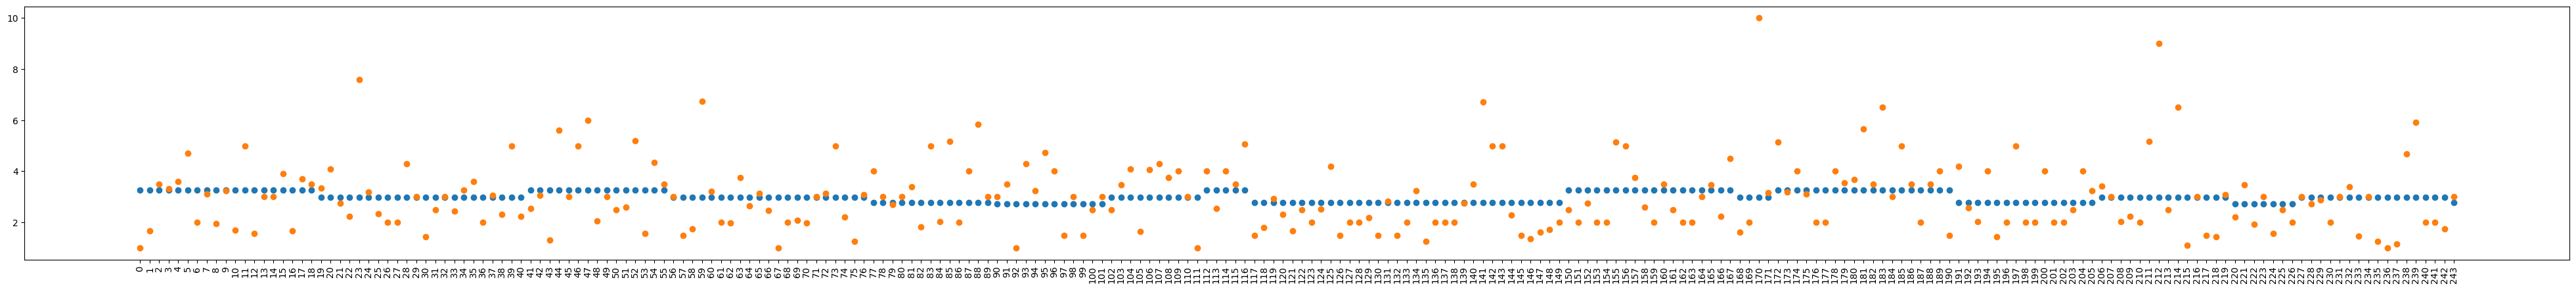

In [32]:
from cProfile import label


result = model.get_prediction(tips_df["day"])

plt.figure(figsize=(50, 5))
plt.scatter(np.arange(tips_df['day'].shape[0]), result.predicted)
plt.scatter(np.arange(tips_df['day'].shape[0]), tips_df['tip'])
ticks = [ f'{i+1}_{v}' for i, v in enumerate(tips_df['day']) ]
plt.xticks(ticks=np.arange(len(ticks)), label=ticks, rotation=90)
plt.show()


In [17]:
type(result)
result.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.255132,0.158060,2.943770,3.566493,0.522949,5.987314
1,3.255132,0.158060,2.943770,3.566493,0.522949,5.987314
2,3.255132,0.158060,2.943770,3.566493,0.522949,5.987314
3,3.255132,0.158060,2.943770,3.566493,0.522949,5.987314
4,3.255132,0.158060,2.943770,3.566493,0.522949,5.987314
...,...,...,...,...,...,...
239,2.993103,0.147730,2.702091,3.284116,0.263165,5.723042
240,2.993103,0.147730,2.702091,3.284116,0.263165,5.723042
241,2.993103,0.147730,2.702091,3.284116,0.263165,5.723042
242,2.993103,0.147730,2.702091,3.284116,0.263165,5.723042


In [35]:
# student_mat.csv 기반 검정

# 성별, Dalc, health,  G1, G2, G3 값의 차이 검정

student_mat_df = pd.read_csv("data-files/student-mat.csv")
student_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [40]:
student_mat_df.groupby("sex")[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


In [44]:
cross_tab = pd.crosstab(student_mat_df['sex'], student_mat_df['G1'])
cross_tab

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sex,,,,,,,,,,,,,,,,,
F,0,1,3,12,26,24,16,29,19,18,16,16,8,13,2,4,1
M,1,0,4,12,11,17,15,22,20,17,17,14,16,9,6,4,2


In [46]:
stats.chi2_contingency(cross_tab)

Chi2ContingencyResult(statistic=15.283968081369057, pvalue=0.503946835591659, dof=16, expected_freq=array([[ 0.52658228,  0.52658228,  3.68607595, 12.63797468, 19.4835443 ,
        21.58987342, 16.32405063, 26.8556962 , 20.53670886, 18.43037975,
        17.37721519, 15.79746835, 12.63797468, 11.58481013,  4.21265823,
         4.21265823,  1.57974684],
       [ 0.47341772,  0.47341772,  3.31392405, 11.36202532, 17.5164557 ,
        19.41012658, 14.67594937, 24.1443038 , 18.46329114, 16.56962025,
        15.62278481, 14.20253165, 11.36202532, 10.41518987,  3.78734177,
         3.78734177,  1.42025316]]))

In [47]:
stats.ttest_ind(student_mat_df[student_mat_df["sex"] == 'M']['G1'],
                student_mat_df[student_mat_df["sex"] == 'F']['G1'])

TtestResult(statistic=1.8283673434285317, pvalue=0.06825227168840965, df=393.0)

In [50]:
# 성별, 주중음주 독립성
cross_tab2 = pd.crosstab(student_mat_df['sex'], student_mat_df['Dalc'])
cross_tab2

stats.chi2_contingency(cross_tab2)

Chi2ContingencyResult(statistic=30.305985130611948, pvalue=4.240254636940353e-06, dof=4, expected_freq=array([[145.33670886,  39.49367089,  13.69113924,   4.73924051,
          4.73924051],
       [130.66329114,  35.50632911,  12.30886076,   4.26075949,
          4.26075949]]))

In [51]:
cross_tab2

Dalc,1,2,3,4,5
sex,,,,,
F,167,33,5,2,1
M,109,42,21,7,8


In [53]:
# 성별, 주중음주 독립성
cross_tab3 = pd.crosstab(student_mat_df['Dalc'], student_mat_df['health'])
cross_tab3

stats.chi2_contingency(cross_tab3)

Chi2ContingencyResult(statistic=21.604778222448928, pvalue=0.15641725047363647, dof=16, expected_freq=array([[ 32.84050633,  31.44303797,  63.58481013,  46.1164557 ,
        102.01518987],
       [  8.92405063,   8.5443038 ,  17.27848101,  12.53164557,
         27.72151899],
       [  3.09367089,   2.96202532,   5.98987342,   4.3443038 ,
          9.61012658],
       [  1.07088608,   1.02531646,   2.07341772,   1.50379747,
          3.32658228],
       [  1.07088608,   1.02531646,   2.07341772,   1.50379747,
          3.32658228]]))